### Clusterin jerárquico y dendrogramas

Antes de empezar, pongamos un poco de notecion para hablar todos el mismo idioma
* X dataset (array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del custer con la informacion de las uniones
* k numero de clustering

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np
import pandas as pd

(150, 2)


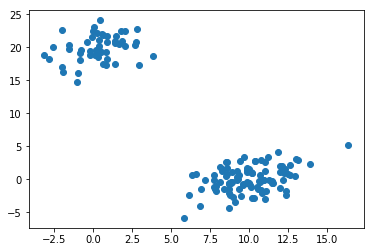

In [7]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size = [ 100])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])
X = np.concatenate((a,b))
print (X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
Z = linkage(X,"ward")
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [13]:
c, coph_dist = cophenet(Z,pdist(X))
print (Z[152-len(X)])#cluste 152
print (Z[158-len(X)])#cluste 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [14]:
X[[33,62,68]] 

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

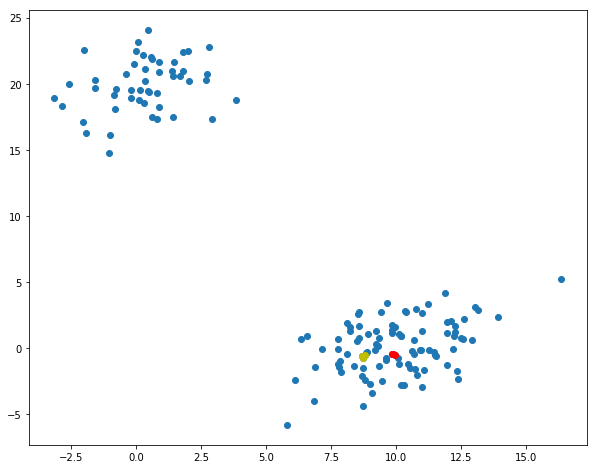

In [18]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])#pintamos todos los puntos
plt.scatter(X[idx,0],X[idx,1], c="r")# destacamos e color rojo los puntos interesantes
plt.scatter(X[idx2,0],X[idx2,1], c="y")# destacamos e color rojo los puntos interesantes
plt.show()

### Representacion grafica de un dendrograma

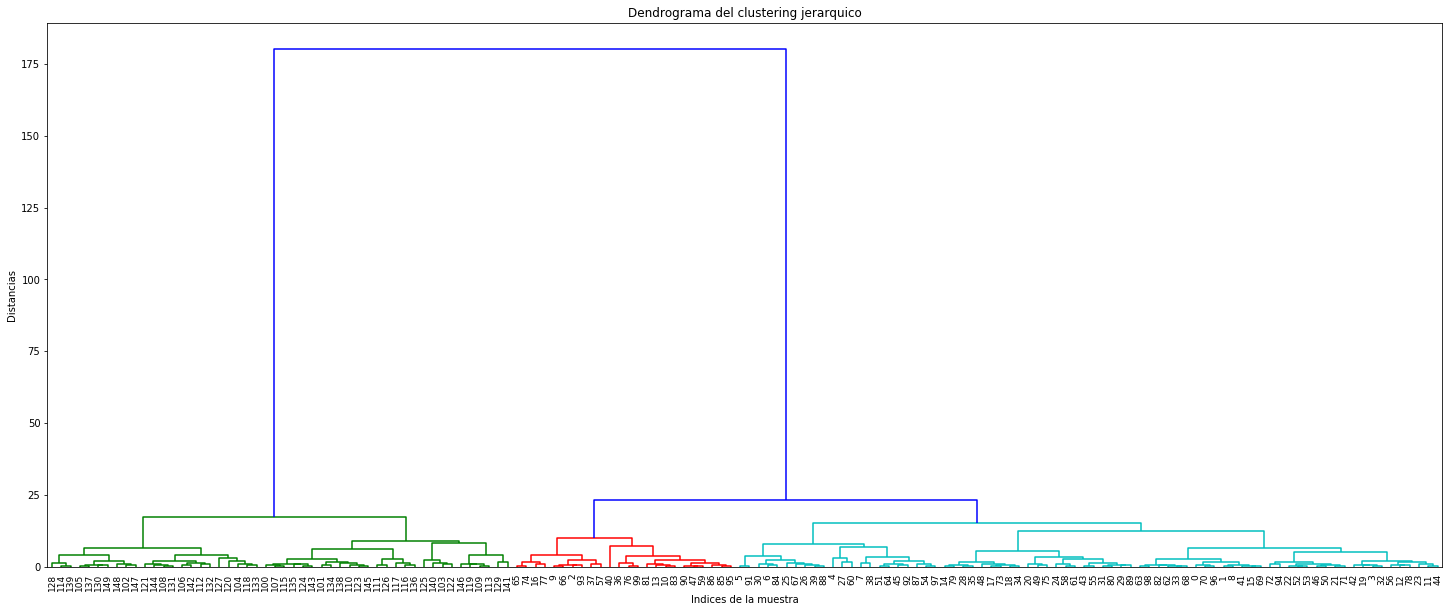

In [30]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90., leaf_font_size=9, color_threshold=0.1*180)
plt.show()

In [28]:
Z[-4:]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma

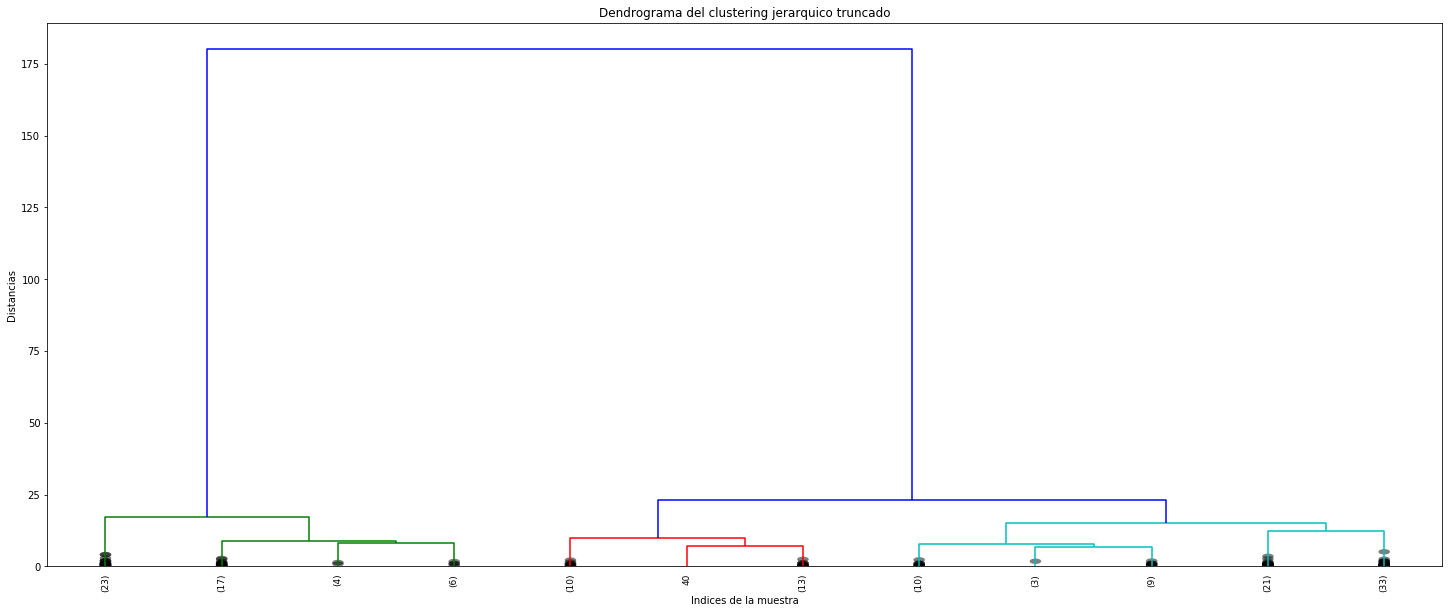

In [39]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerarquico truncado")
plt.xlabel("Indices de la muestra")
plt.ylabel("Distancias")
dendrogram(Z,leaf_rotation=90., leaf_font_size=9, color_threshold=0.1*180, truncate_mode="lastp", p=12,show_leaf_counts=True,show_contracted=True)
plt.show()

### Dendrograma tuneado

In [63]:
def dendrogram_tune(*args,**kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop("annotate_above",0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title(" del clustering jerarquico con Dendrograma truncado")
        plt.xlabel("Indices del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancias")
        for index,distance,color in zip(ddata["icoord"],ddata["dcoord"],ddata["color_list"]):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c=color)
                plt.annotate("%.3g"%y,(x,y), xytext=(0,-5),textcoords = "offset points", va="top", ha="center")
    if(max_d):
        plt.axhline(y=max_d,c='k')
    return ddata
    

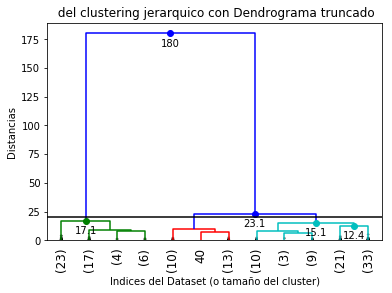

In [66]:
dendrogram_tune(Z,truncate_mode="lastp",p=12, leaf_rotation=90., leaf_font_size=12.,show_contracted=True,annotate_above=10,max_d=20)
plt.show()

### Corte automatico del dendrograma
inconsistency_i =  (h_i- avg(h_j)) / std(h_j)

In [69]:
from scipy.cluster.hierarchy import inconsistent

In [73]:
depth = 10
incons = inconsistent(Z,depth)
incons[-10:] 
# Este metodo como hace promedio por lo visto en la grafica no es muy recomendable por que hace promedio 
#y se puede perder esa diferencia sginificativa en la union de los ultimos niveles

array([[  1.43709166,   2.0084826 ,  13.        ,   2.8250029 ],
       [  1.85344548,   2.08424917,  21.        ,   2.88609444],
       [  2.24511599,   2.44225327,   9.        ,   2.37659088],
       [  1.91884501,   2.32897554,  26.        ,   2.93235271],
       [  1.71510094,   2.44133461,  23.        ,   3.32980876],
       [  1.20775382,   2.07193056,  53.        ,   5.41504286],
       [  1.57398185,   2.60516445,  75.        ,   5.19788658],
       [  2.03457492,   2.97335058,  49.        ,   5.07195444],
       [  1.82442373,   3.33796505,  99.        ,   6.38040402],
       [  3.09115806,  14.95993062, 149.        ,  11.84358916]])

El ultimo valor seria el valor de inconsistencia, osea cuando un cluster es muy diferente de otro cluster con un valor muy grande con respecto a los anteriores

### Metodo del codo
Intenta buscar el step del custering donde la aceleracion del crecimiento de la distancia es mayor

In [75]:
last = Z[-10:,2]
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]
[ 1.51141725e+02  4.00677330e+00 -6.88042176e-01  1.04916333e-01
  1.48701273e+00  3.97185622e-01  5.18302524e-01 -5.77157189e-01]


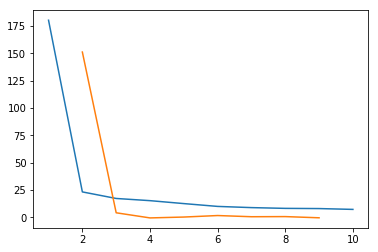

El numero optimo de cluster es 2


In [87]:
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1,len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("El numero optimo de cluster es "+str(k))
# Lo malo de este metodo es que siempre deben existir 2 cluster nunca puede haber 1 solo cluster
# si la idea es que todas las  muestras vivan en 1 unico cluster este metodo no sirve
# SE debe tener cuidado por que pueda pasar que al hacer las diferencia el salto este al inicio de los 10(n) que elegimos
# por tanto el salto no se veria


In [88]:
c= np.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200,])
d= np.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200,])
e= np.random.multivariate_normal([0,100],[[100,1],[1,100]],size=[200,])

In [92]:
X2 = np.concatenate((X,c,d,e),)
X2

array([[  9.21188389,  -0.15188589],
       [  8.88937431,  -0.33937464],
       [ 10.76840064,   2.95244645],
       ...,
       [-12.20594575, 109.50067591],
       [ 13.24465616,  96.34779325],
       [ -9.44865534,  99.62665327]])

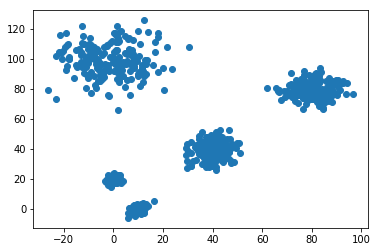

In [94]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [96]:
Z2 = linkage(X2,"ward")

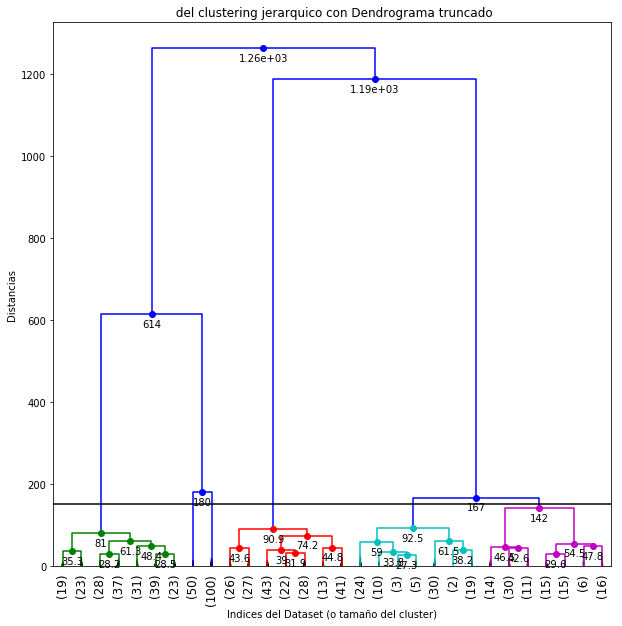

In [101]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30, 
    leaf_rotation=90., 
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=150)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]
[-496.93129039  138.89916037  420.18853283  -11.13389114  -24.63840492
   47.74453098   -8.31095969    3.14762651]


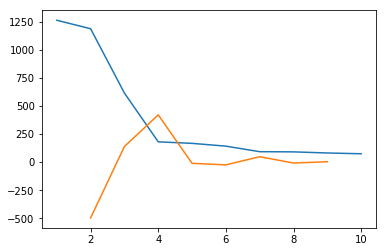

El numero optimo de cluster es 4


In [104]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1,len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
print(acc_rev)
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("El numero optimo de cluster es "+str(k))

In [107]:
print(inconsistent(Z2,5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


* Sentido Comun antes de la tecnicas
* conocer muy bien que estamos investigando
* y asi podremos darle mejor sentido a lo que estamos analizando

## Recuperar los clusters y sus elementos

In [108]:
from scipy.cluster.hierarchy import fcluster

In [111]:
max_d = 20 # es la distancia donde dibujamos la linea y que marca la divicion de los 3 clusters
clusters = fcluster(Z, max_d,criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [116]:
k=2 # basandonos visualmente en la linea vemos que son 3 clusters
clusters = fcluster(Z, k,criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [114]:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

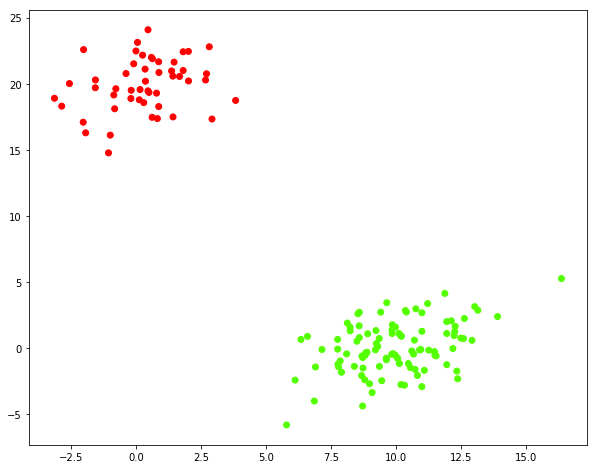

In [118]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c = clusters, cmap="prism")
plt.show()

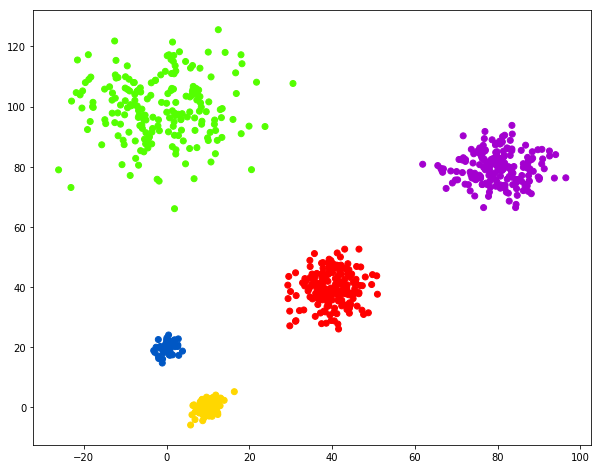

In [120]:
max_d = 170 # es la distancia donde dibujamos la linea y que marca la divicion de los 3 clusters
clusters = fcluster(Z2, max_d,criterion="distance")
clusters
plt.figure(figsize=(10,8))
plt.scatter(X2[:,0],X2[:,1],c = clusters, cmap="prism")
plt.show()

## Si se hace el corte en donde no se debe lo que pasa es que juntamos informacion que probablemente no tengo mucha relacion


### Nuestras teorias se deben ajustar a los datos